# Compare outcomes from differential analysis based on different imputation methods

- load scores based on `10_1_ald_diff_analysis`

In [1]:
import logging
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import display

import pimmslearn
import pimmslearn.databases.diseases

logger = pimmslearn.logging.setup_nb_logger()

plt.rcParams['figure.figsize'] = (2, 2)
fontsize = 5
pimmslearn.plotting.make_large_descriptors(fontsize)
logging.getLogger('fontTools').setLevel(logging.ERROR)

# catch passed parameters
args = None
args = dict(globals()).keys()

## Parameters
Default and set parameters for the notebook.

In [2]:
folder_experiment = 'runs/appl_ald_data/plasma/proteinGroups'

target = 'kleiner'
model_key = 'VAE'
baseline = 'RSN'
out_folder = 'diff_analysis'
selected_statistics = ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected']

disease_ontology = 5082  # code from https://disease-ontology.org/
# split diseases notebook? Query gene names for proteins in file from uniprot?
annotaitons_gene_col = 'PG.Genes'

In [3]:
# Parameters
disease_ontology = 10652
folder_experiment = "runs/alzheimer_study"
target = "AD"
baseline = "PI"
model_key = "DAE"
out_folder = "diff_analysis"
annotaitons_gene_col = "None"


Add set parameters to configuration

In [4]:
params = pimmslearn.nb.get_params(args, globals=globals())
args = pimmslearn.nb.Config()
args.folder_experiment = Path(params["folder_experiment"])
args = pimmslearn.nb.add_default_paths(args,
                                 out_root=(
                                     args.folder_experiment
                                     / params["out_folder"]
                                     / params["target"]
                                     / f"{params['baseline']}_vs_{params['model_key']}"))
args.update_from_dict(params)
args.scores_folder = scores_folder = (args.folder_experiment
                                      / params["out_folder"]
                                      / params["target"]
                                      / 'scores')
args.freq_features_observed = args.folder_experiment / 'freq_features_observed.csv'
args

root - INFO     Removed from global namespace: folder_experiment


root - INFO     Removed from global namespace: target


root - INFO     Removed from global namespace: model_key


root - INFO     Removed from global namespace: baseline


root - INFO     Removed from global namespace: out_folder


root - INFO     Removed from global namespace: selected_statistics


root - INFO     Removed from global namespace: disease_ontology


root - INFO     Removed from global namespace: annotaitons_gene_col


root - INFO     Already set attribute: folder_experiment has value runs/alzheimer_study


root - INFO     Already set attribute: out_folder has value diff_analysis


{'annotaitons_gene_col': 'None',
 'baseline': 'PI',
 'data': PosixPath('runs/alzheimer_study/data'),
 'disease_ontology': 10652,
 'folder_experiment': PosixPath('runs/alzheimer_study'),
 'freq_features_observed': PosixPath('runs/alzheimer_study/freq_features_observed.csv'),
 'model_key': 'DAE',
 'out_figures': PosixPath('runs/alzheimer_study/figures'),
 'out_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/PI_vs_DAE'),
 'out_metrics': PosixPath('runs/alzheimer_study'),
 'out_models': PosixPath('runs/alzheimer_study'),
 'out_preds': PosixPath('runs/alzheimer_study/preds'),
 'scores_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/scores'),
 'selected_statistics': ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected'],
 'target': 'AD'}

### Excel file for exports

In [5]:
files_out = dict()
writer_args = dict(float_format='%.3f')

fname = args.out_folder / 'diff_analysis_compare_methods.xlsx'
files_out[fname.name] = fname
writer = pd.ExcelWriter(fname)
logger.info("Writing to excel file: %s", fname)

root - INFO     Writing to excel file: runs/alzheimer_study/diff_analysis/AD/PI_vs_DAE/diff_analysis_compare_methods.xlsx


## Load scores

### Load baseline model scores
Show all statistics, later use selected statistics

In [6]:
fname = args.scores_folder / f'diff_analysis_scores_{args.baseline}.pkl'
scores_baseline = pd.read_pickle(fname)
scores_baseline

model                                     PI                        \
var                                       SS DF      F p-unc   np2   
protein groups               Source                                  
A0A024QZX5;A0A087X1N8;P35237 AD        0.776  1  1.328 0.251 0.007   
                             age       0.124  1  0.212 0.646 0.001   
                             Kiel      2.222  1  3.802 0.053 0.020   
                             Magdeburg 4.481  1  7.667 0.006 0.039   
                             Sweden    7.062  1 12.082 0.001 0.059   
...                                      ... ..    ...   ...   ...   
S4R3U6                       AD        0.111  1  0.117 0.733 0.001   
                             age       1.902  1  1.995 0.159 0.010   
                             Kiel      0.036  1  0.038 0.845 0.000   
                             Magdeburg 4.097  1  4.298 0.039 0.022   
                             Sweden    9.851  1 10.336 0.002 0.051   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                0.601  0.406    False  
                             age               0.190  0.769    False  
                             Kiel              1.279  0.127    False  
                             Magdeburg         2.209  0.023     True  
                             Sweden            3.201  0.003     True  
...                                              ...    ...      ...  
S4R3U6                       AD                0.135  0.834    False  
                             age               0.797  0.296    False  
                             Kiel              0.073  0.909    False  
                             Magdeburg         1.403  0.102    False  
                             Sweden            2.815  0.007     True  

[7105 rows x 8 columns]

### Load selected comparison model scores

In [7]:
fname = args.scores_folder / f'diff_analysis_scores_{args.model_key}.pkl'
scores_model = pd.read_pickle(fname)
scores_model

model                                     DAE                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         1.049  1  7.522 0.007 0.038   
                             age        0.005  1  0.034 0.854 0.000   
                             Kiel       0.284  1  2.038 0.155 0.011   
                             Magdeburg  0.525  1  3.767 0.054 0.019   
                             Sweden     1.839  1 13.192 0.000 0.065   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         3.568  1  5.711 0.018 0.029   
                             age        0.473  1  0.757 0.385 0.004   
                             Kiel       3.678  1  5.887 0.016 0.030   
                             Magdeburg  3.868  1  6.191 0.014 0.031   
                             Sweden    22.090  1 35.357 0.000 0.156   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                2.176  0.019     True  
                             age               0.069  0.904    False  
                             Kiel              0.809  0.257    False  
                             Magdeburg         1.270  0.110    False  
                             Sweden            3.442  0.001     True  
...                                              ...    ...      ...  
S4R3U6                       AD                1.749  0.044     True  
                             age               0.414  0.517    False  
                             Kiel              1.791  0.040     True  
                             Magdeburg         1.863  0.035     True  
                             Sweden            7.892  0.000     True  

[7105 rows x 8 columns]

### Combined scores
show only selected statistics for comparsion

In [8]:
scores = scores_model.join(scores_baseline, how='outer')[[args.baseline, args.model_key]]
scores = scores.loc[:, pd.IndexSlice[scores.columns.levels[0].to_list(),
                                     args.selected_statistics]]
scores

model                                    DAE                                \
var                                    p-unc -Log10 pvalue qvalue rejected   
protein groups               Source                                          
A0A024QZX5;A0A087X1N8;P35237 AD        0.007         2.176  0.019     True   
                             age       0.854         0.069  0.904    False   
                             Kiel      0.155         0.809  0.257    False   
                             Magdeburg 0.054         1.270  0.110    False   
                             Sweden    0.000         3.442  0.001     True   
...                                      ...           ...    ...      ...   
S4R3U6                       AD        0.018         1.749  0.044     True   
                             age       0.385         0.414  0.517    False   
                             Kiel      0.016         1.791  0.040     True   
                             Magdeburg 0.014         1.863  0.035     True   
                             Sweden    0.000         7.892  0.000     True   

model                                     PI                                
var                                    p-unc -Log10 pvalue qvalue rejected  
protein groups               Source                                         
A0A024QZX5;A0A087X1N8;P35237 AD        0.251         0.601  0.406    False  
                             age       0.646         0.190  0.769    False  
                             Kiel      0.053         1.279  0.127    False  
                             Magdeburg 0.006         2.209  0.023     True  
                             Sweden    0.001         3.201  0.003     True  
...                                      ...           ...    ...      ...  
S4R3U6                       AD        0.733         0.135  0.834    False  
                             age       0.159         0.797  0.296    False  
                             Kiel      0.845         0.073  0.909    False  
                             Magdeburg 0.039         1.403  0.102    False  
                             Sweden    0.002         2.815  0.007     True  

[7105 rows x 8 columns]

Models in comparison (name mapping)

In [9]:
models = pimmslearn.nb.Config.from_dict(
    pimmslearn.pandas.index_to_dict(scores.columns.get_level_values(0)))
vars(models)

{'DAE': 'DAE', 'PI': 'PI'}

## Describe scores

In [10]:
scores.describe()

model       DAE                                PI                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 7,105.000     7,105.000 7,105.000 7,105.000     7,105.000 7,105.000
mean      0.225         3.280     0.279     0.261         2.477     0.338
std       0.293         6.195     0.320     0.303         5.331     0.331
min       0.000         0.000     0.000     0.000         0.000     0.000
25%       0.000         0.406     0.002     0.004         0.329     0.015
50%       0.061         1.213     0.122     0.123         0.909     0.247
75%       0.393         3.304     0.524     0.469         2.421     0.625
max       1.000        86.806     1.000     0.999       150.234     0.999

### One to one comparison of by feature:

In [11]:
scores = scores.loc[pd.IndexSlice[:, args.target], :]
scores.to_excel(writer, 'scores', **writer_args)
scores

model                                                       DAE                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.007         2.176   
A0A024R0T9;K7ER74;P02655                           AD     0.033         1.476   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.250         0.603   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.253         0.597   
A0A075B6H7                                         AD     0.015         1.821   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.237         0.625   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.951         0.022   
S4R3U6                                             AD     0.018         1.749   

model                                                                      \
var                                                       qvalue rejected   
protein groups                                     Source                   
A0A024QZX5;A0A087X1N8;P35237                       AD      0.019     True   
A0A024R0T9;K7ER74;P02655                           AD      0.074    False   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.374    False   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.378    False   
A0A075B6H7                                         AD      0.038     True   
...                                                          ...      ...   
Q9Y6R7                                             AD      0.283    False   
Q9Y6X5                                             AD      0.359    False   
Q9Y6Y8;Q9Y6Y8-2                                    AD      0.158    False   
Q9Y6Y9                                             AD      0.970    False   
S4R3U6                                             AD      0.044     True   

model                                                        PI                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.251         0.601   
A0A024R0T9;K7ER74;P02655                           AD     0.046         1.340   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.076         1.119   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.532         0.274   
A0A075B6H7                                         AD     0.245         0.611   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.049         1.309   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.341         0.467   
S4R3U6                                             AD     0.733         0.135   

model                                                                      
var                                                       qvalue rejected  
protein groups                                     Source                  
A0A024QZX5;A0A087X1N8;P35237                       AD      0.406    False  
A0A024R0T9;K7ER74;P02655                           AD      0.115    False  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.171    False  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.678    False  
A0A075B6H7                                         AD      0.400    False  
...                                        

And the descriptive statistics
of the numeric values:

In [12]:
scores.describe()

model       DAE                                PI                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 1,421.000     1,421.000 1,421.000 1,421.000     1,421.000 1,421.000
mean      0.238         1.609     0.298     0.253         1.402     0.336
std       0.289         1.901     0.313     0.291         1.637     0.316
min       0.000         0.001     0.000     0.000         0.001     0.000
25%       0.007         0.379     0.019     0.013         0.372     0.041
50%       0.089         1.049     0.167     0.126         0.900     0.251
75%       0.418         2.172     0.547     0.425         1.901     0.585
max       0.998        24.507     0.999     0.997        22.834     0.998

and the boolean decision values

In [13]:
scores.describe(include=['bool', 'O'])

model,DAE,PI
var,rejected,rejected
count,1421,1421
unique,2,2
top,False,False
freq,940,1033


## Load frequencies of observed features

In [14]:
freq_feat = pd.read_csv(args.freq_features_observed, index_col=0)
freq_feat.columns = pd.MultiIndex.from_tuples([('data', 'frequency'),])
freq_feat

,data
,frequency
protein groups,
A0A024QZX5;A0A087X1N8;P35237,186
A0A024R0T9;K7ER74;P02655,195
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,174
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,196
A0A075B6H7,91
...,...
Q9Y6R7,197
Q9Y6X5,173


## Compare shared features

In [15]:
scores_common = (scores
                 .dropna()
                 .reset_index(-1, drop=True)
                 ).join(
    freq_feat, how='left'
)
scores_common

DAE                       \
                                                   p-unc -Log10 pvalue qvalue   
protein groups                                                                  
A0A024QZX5;A0A087X1N8;P35237                       0.007         2.176  0.019   
A0A024R0T9;K7ER74;P02655                           0.033         1.476  0.074   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... 0.250         0.603  0.374   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            0.253         0.597  0.378   
A0A075B6H7                                         0.015         1.821  0.038   
...                                                  ...           ...    ...   
Q9Y6R7                                             0.175         0.756  0.283   
Q9Y6X5                                             0.237         0.625  0.359   
Q9Y6Y8;Q9Y6Y8-2                                    0.083         1.079  0.158   
Q9Y6Y9                                             0.951         0.022  0.970   
S4R3U6                                             0.018         1.749  0.044   

                                                               PI  \
                                                   rejected p-unc   
protein groups                                                      
A0A024QZX5;A0A087X1N8;P35237                           True 0.251   
A0A024R0T9;K7ER74;P02655                              False 0.046   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False 0.076   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False 0.532   
A0A075B6H7                                             True 0.245   
...                                                     ...   ...   
Q9Y6R7                                                False 0.175   
Q9Y6X5                                                False 0.049   
Q9Y6Y8;Q9Y6Y8-2                                       False 0.083   
Q9Y6Y9                                                False 0.341   
S4R3U6                                                 True 0.733   

                                                                         \
                                                   -Log10 pvalue qvalue   
protein groups                                                            
A0A024QZX5;A0A087X1N8;P35237                               0.601  0.406   
A0A024R0T9;K7ER74;P02655                                   1.340  0.115   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...         1.119  0.171   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503                    0.274  0.678   
A0A075B6H7                                                 0.611  0.400   
...                                                          ...    ...   
Q9Y6R7                                                     0.756  0.317   
Q9Y6X5                                                     1.309  0.121   
Q9Y6Y8;Q9Y6Y8-2                                            1.079  0.183   
Q9Y6Y9                                                     0.467  0.505   
S4R3U6                                                     0.135  0.834   

                                                                 data  
                                                   rejected frequency  
protein groups                                                         
A0A024QZX5;A0A087X1N8;P35237                          False       186  
A0A024R0T9;K7ER74;P02655                              False       195  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False       174  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False       196  
A0A075B6H7                                            False        91  
...                                                     ...       ...  
Q9Y6R7                                                False       197  
Q9Y6X5                                                False       173  
Q9Y6Y8;Q9Y6Y8-2                                       False       197  
Q9Y6Y9                              

### Annotate decisions in Confusion Table style:

In [16]:
def annotate_decision(scores, model, model_column):
    return scores[(model_column, 'rejected')].replace({False: f'{model} (no) ', True: f'{model} (yes)'})


annotations = None
for model, model_column in models.items():
    if annotations is not None:
        annotations += ' - '
        annotations += annotate_decision(scores_common,
                                         model=model, model_column=model_column)
    else:
        annotations = annotate_decision(
            scores_common, model=model, model_column=model_column)
annotations.name = 'Differential Analysis Comparison'
annotations.value_counts()

Differential Analysis Comparison
DAE (no)  - PI (no)    890
DAE (yes) - PI (yes)   338
DAE (yes) - PI (no)    143
DAE (no)  - PI (yes)    50
Name: count, dtype: int64

### List different decisions between models

In [17]:
mask_different = (
    (scores_common.loc[:, pd.IndexSlice[:, 'rejected']].any(axis=1))
    & ~(scores_common.loc[:, pd.IndexSlice[:, 'rejected']].all(axis=1))
)
_to_write = scores_common.loc[mask_different]
_to_write.to_excel(writer, 'differences', **writer_args)
logger.info("Writen to Excel file under sheet 'differences'.")
_to_write

root - INFO     Writen to Excel file under sheet 'differences'.


DAE                                  PI  \
                             p-unc -Log10 pvalue qvalue rejected p-unc   
protein groups                                                           
A0A024QZX5;A0A087X1N8;P35237 0.007         2.176  0.019     True 0.251   
A0A075B6H7                   0.015         1.821  0.038     True 0.245   
A0A075B6I0                   0.001         3.176  0.003     True 0.020   
A0A075B6R2                   0.000         3.418  0.002     True 0.389   
A0A075B6S5                   0.014         1.843  0.037     True 0.111   
...                            ...           ...    ...      ...   ...   
Q9UKB5                       0.073         1.139  0.141    False 0.011   
Q9UP79                       0.000         4.426  0.000     True 0.358   
Q9UQ52                       0.001         3.191  0.002     True 0.072   
Q9Y6C2                       0.003         2.516  0.010     True 0.492   
S4R3U6                       0.018         1.749  0.044     True 0.733   

                                                                data  
                             -Log10 pvalue qvalue rejected frequency  
protein groups                                                        
A0A024QZX5;A0A087X1N8;P35237         0.601  0.406    False       186  
A0A075B6H7                           0.611  0.400    False        91  
A0A075B6I0                           1.692  0.060    False       194  
A0A075B6R2                           0.410  0.551    False       164  
A0A075B6S5                           0.955  0.227    False       129  
...                                    ...    ...      ...       ...  
Q9UKB5                               1.940  0.038     True       148  
Q9UP79                               0.446  0.520    False       135  
Q9UQ52                               1.141  0.164    False       188  
Q9Y6C2                               0.308  0.645    False       119  
S4R3U6                               0.135  0.834    False       126  

[193 rows x 9 columns]

## Plot qvalues of both models with annotated decisions

Prepare data for plotting (qvalues)

In [18]:
var = 'qvalue'
to_plot = [scores_common[v][var] for v in models.values()]
for s, k in zip(to_plot, models.keys()):
    s.name = k.replace('_', ' ')
to_plot.append(scores_common['data'])
to_plot.append(annotations)
to_plot = pd.concat(to_plot, axis=1)
to_plot

,DAE,PI,frequency,Differential Analysis Comparison
protein groups,,,,
A0A024QZX5;A0A087X1N8;P35237,0.019,0.406,186,DAE (yes) - PI (no)
A0A024R0T9;K7ER74;P02655,0.074,0.115,195,DAE (no) - PI (no)
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,0.374,0.171,174,DAE (no) - PI (no)
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,0.378,0.678,196,DAE (no) - PI (no)
A0A075B6H7,0.038,0.400,91,DAE (yes) - PI (no)
...,...,...,...,...
Q9Y6R7,0.283,0.317,197,DAE (no) - PI (no)
Q9Y6X5,0.359,0.121,173,DAE (no) - PI (no)
Q9Y6Y8;Q9Y6Y8-2,0.158,0.183,197,DAE (no) - PI (no)


List of features with the highest difference in qvalues

In [19]:
# should it be possible to run not only RSN?
to_plot['diff_qvalue'] = (to_plot[str(args.baseline)] - to_plot[str(args.model_key)]).abs()
to_plot.loc[mask_different].sort_values('diff_qvalue', ascending=False)

,DAE,PI,frequency,Differential Analysis Comparison,diff_qvalue
protein groups,,,,,
Q7Z5L0,0.002,0.998,53,DAE (yes) - PI (no),0.996
A0A087WU43;A0A087WX17;A0A087WXI5;P12830;P12830-2,0.000,0.989,134,DAE (yes) - PI (no),0.989
A0A0C4DH31,0.034,0.968,52,DAE (yes) - PI (no),0.934
P51674;P51674-2;P51674-3,0.003,0.921,55,DAE (yes) - PI (no),0.918
P22692;P22692-2,0.026,0.943,170,DAE (yes) - PI (no),0.917
...,...,...,...,...,...
F5GY80;F5H7G1;P07358,0.047,0.057,197,DAE (yes) - PI (no),0.011
Q9NX62,0.045,0.056,197,DAE (yes) - PI (no),0.011
P00740;P00740-2,0.043,0.053,197,DAE (yes) - PI (no),0.010


### Differences plotted with created annotations

pimmslearn.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_DAE/diff_analysis_comparision_1_DAE


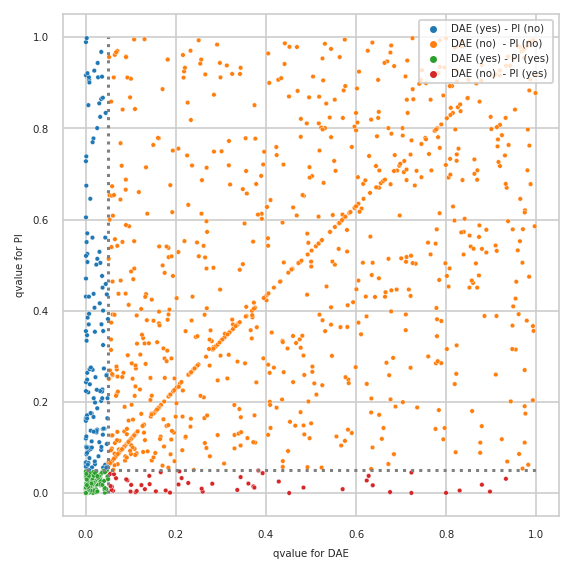

In [20]:
figsize = (4, 4)
size = 5
fig, ax = plt.subplots(figsize=figsize)
x_col = to_plot.columns[0]
y_col = to_plot.columns[1]
ax = sns.scatterplot(data=to_plot,
                     x=x_col,
                     y=y_col,
                     s=size,
                     hue='Differential Analysis Comparison',
                     ax=ax)
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.4,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_1_{args.model_key}'] = (
    args.out_folder /
    f'diff_analysis_comparision_1_{args.model_key}')
fname = files_out[f'diff_analysis_comparision_1_{args.model_key}']
pimmslearn.savefig(fig, name=fname)

- also showing how many features were measured ("observed") by size of circle

pimmslearn.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_DAE/diff_analysis_comparision_2_DAE


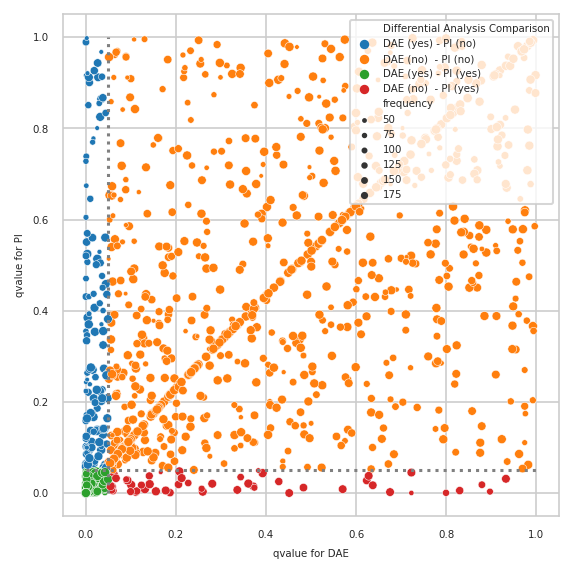

In [21]:
fig, ax = plt.subplots(figsize=figsize)
ax = sns.scatterplot(data=to_plot,
                     x=to_plot.columns[0],
                     y=to_plot.columns[1],
                     size='frequency',
                     s=size,
                     sizes=(5, 20),
                     hue='Differential Analysis Comparison')
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.6,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_2_{args.model_key}'] = (
    args.out_folder / f'diff_analysis_comparision_2_{args.model_key}')
pimmslearn.savefig(
    fig, name=files_out[f'diff_analysis_comparision_2_{args.model_key}'])

## Only features contained in model
- this block exist due to a specific part in the ALD analysis of the paper

In [22]:
scores_model_only = scores.reset_index(level=-1, drop=True)
_diff = scores_model_only.index.difference(scores_common.index)
if not _diff.empty:
    scores_model_only = (scores_model_only
                         .loc[
                             _diff,
                             args.model_key]
                         .sort_values(by='qvalue', ascending=True)
                         .join(freq_feat.squeeze().rename(freq_feat.columns.droplevel()[0])
                               )
                         )
    display(scores_model_only)
else:
    scores_model_only = None
    logger.info("No features only in new comparision model.")

if not _diff.empty:
    scores_model_only.to_excel(writer, 'only_model', **writer_args)
    display(scores_model_only.rejected.value_counts())
    scores_model_only_rejected = scores_model_only.loc[scores_model_only.rejected]
    scores_model_only_rejected.to_excel(
        writer, 'only_model_rejected', **writer_args)

root - INFO     No features only in new comparision model.


## DISEASES DB lookup

Query diseases database for gene associations with specified disease ontology id.

In [23]:
data = pimmslearn.databases.diseases.get_disease_association(
    doid=args.disease_ontology, limit=10000)
data = pd.DataFrame.from_dict(data, orient='index').rename_axis('ENSP', axis=0)
data = data.rename(columns={'name': args.annotaitons_gene_col}).reset_index(
).set_index(args.annotaitons_gene_col)
data

,ENSP,score
None,,
PSEN2,ENSP00000355747,5.000
APOE,ENSP00000252486,5.000
PSEN1,ENSP00000326366,5.000
APP,ENSP00000284981,5.000
CLU,ENSP00000315130,4.263
...,...,...
HBS1L,ENSP00000356811,0.508
SMAD9,ENSP00000369154,0.506
ANKRD11,ENSP00000301030,0.505


## Shared features
ToDo: new script -> DISEASES DB lookup

In [24]:
feat_name = scores.index.names[0]  # first index level is feature name
if args.annotaitons_gene_col in scores.index.names:
    logger.info(f"Found gene annotation in scores index:  {scores.index.names}")
else:
    logger.info(f"No gene annotation in scores index:  {scores.index.names}"
                " Exiting.")
    import sys
    sys.exit(0)

root - INFO     No gene annotation in scores index:  ['protein groups', 'Source'] Exiting.


SystemExit: 0

/usr/share/miniconda3/envs/pimms/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3516: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
gene_to_PG = (scores.droplevel(
    list(set(scores.index.names) - {feat_name, args.annotaitons_gene_col})
)
    .index
    .to_frame()
    .reset_index(drop=True)
    .set_index(args.annotaitons_gene_col)
)
gene_to_PG.head()

In [ ]:
disease_associations_all = data.join(
    gene_to_PG).dropna().reset_index().set_index(feat_name).join(annotations)
disease_associations_all

## only by model

In [ ]:
idx = disease_associations_all.index.intersection(scores_model_only.index)
disease_assocications_new = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new.head(20)

In [ ]:
mask = disease_assocications_new.loc[idx, 'score'] >= 2.0
disease_assocications_new.loc[idx].loc[mask]

## Only by model which were significant

In [ ]:
idx = disease_associations_all.index.intersection(
    scores_model_only_rejected.index)
disease_assocications_new_rejected = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new_rejected.head(20)

In [ ]:
mask = disease_assocications_new_rejected.loc[idx, 'score'] >= 2.0
disease_assocications_new_rejected.loc[idx].loc[mask]

## Shared which are only significant for by model

In [ ]:
mask = (scores_common[(str(args.model_key), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_model = (disease_associations_all.loc[idx].sort_values(
    'score', ascending=False))
disease_assocications_shared_rejected_by_model.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_model.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_model.loc[idx].loc[mask]

## Only significant by RSN

In [ ]:
mask = (scores_common[(str(args.baseline), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_RSN = (
    disease_associations_all
    .loc[idx]
    .sort_values('score', ascending=False))
disease_assocications_shared_rejected_by_RSN.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_RSN.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_RSN.loc[idx].loc[mask]

## Write to excel

In [ ]:
disease_associations_all.to_excel(
    writer, sheet_name='disease_assoc_all', **writer_args)
disease_assocications_new.to_excel(
    writer, sheet_name='disease_assoc_new', **writer_args)
disease_assocications_new_rejected.to_excel(
    writer, sheet_name='disease_assoc_new_rejected', **writer_args)

## Outputs

In [ ]:
writer.close()
files_out